In [ ]:
"""
Assignment: 3
Task : K Nearest Neighbor Classifier
ID: 190104140 
Section: C2

"""

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# uploaded = files.upload()

train = pd.read_csv('/content/train_knn.txt', sep = "," ,  header = None, dtype = 'Int64')
test = pd.read_csv('/content/test_knn.txt', sep = "," ,  header = None, dtype = 'Int64')

train = train.rename(columns={0: "feature1", 1: "feature2", 2: "class"})
test = test.rename(columns={0: "feature1", 1: "feature2"})

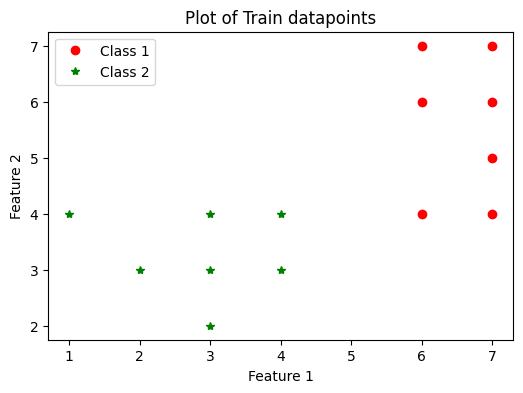

In [3]:
# Plot of classified Train datapoints

class1 = train[train["class"] == 1]
class2 = train[train["class"] == 2]

plt.close()
plt.figure(figsize=(6, 4))
plt.plot(class1.iloc[:,0], class1.iloc[:,1], 'ro', label= 'Class 1')
plt.plot(class2.iloc[:,0], class2.iloc[:,1], 'g*', label= 'Class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Plot of Train datapoints")
plt.legend()
plt.show()

In [10]:
# Implementation of K Nearest Neighbor Algorithm

K = int(input("Value of K: "))

x1 = train['feature1']
x2 = test['feature1']
y1 = train['feature2']
y2 = test['feature2']

predicted = []
file = open("prediction.txt", "a")

for i in range(len(test)):
  distance = []
  file.write(f"Test point: {x2[i]}, {y2[i]}\n\n")

  for j in range(len(train)):
    distance.append(pow((x2[i]-x1[j]), 2) + pow((y2[i]-y1[j]), 2))

  neighbor_indices = np.argsort(distance)[:K]
  neighbor_classes = train.loc[neighbor_indices, ["class"]]
  predicted.append(int(neighbor_classes.mode()["class"]))

  for count, index in enumerate(neighbor_indices):
    file.write(f"Distance {count + 1}: {distance[index]} \t Class: {int(neighbor_classes.iloc[count])}\n")
  file.write(f"Predicted Class: {predicted[i]}\n\n\n")

test["class"] = predicted
file.close()

Value of K: 3
Test point: 3, 7

Distance 1: 9 	 Class: 1
Distance 2: 9 	 Class: 2
Distance 3: 10 	 Class: 1
Predicted Class: 1


Test point: 7, 7

Distance 1: 0 	 Class: 1
Distance 2: 1 	 Class: 1
Distance 3: 1 	 Class: 1
Predicted Class: 1


Test point: 4, 3

Distance 1: 0 	 Class: 2
Distance 2: 1 	 Class: 2
Distance 3: 1 	 Class: 2
Predicted Class: 2


Test point: 2, 8

Distance 1: 17 	 Class: 1
Distance 2: 17 	 Class: 2
Distance 3: 17 	 Class: 2
Predicted Class: 2


Test point: 3, 5

Distance 1: 1 	 Class: 2
Distance 2: 2 	 Class: 2
Distance 3: 4 	 Class: 2
Predicted Class: 2


Test point: 1, 2

Distance 1: 2 	 Class: 2
Distance 2: 4 	 Class: 2
Distance 3: 4 	 Class: 2
Predicted Class: 2


Test point: 4, 8

Distance 1: 5 	 Class: 1
Distance 2: 8 	 Class: 1
Distance 3: 10 	 Class: 1
Predicted Class: 1


Test point: 8, 3

Distance 1: 2 	 Class: 1
Distance 2: 5 	 Class: 1
Distance 3: 5 	 Class: 1
Predicted Class: 1


Test point: 8, 4

Distance 1: 1 	 Class: 1
Distance 2: 2 	 Class: 1
D

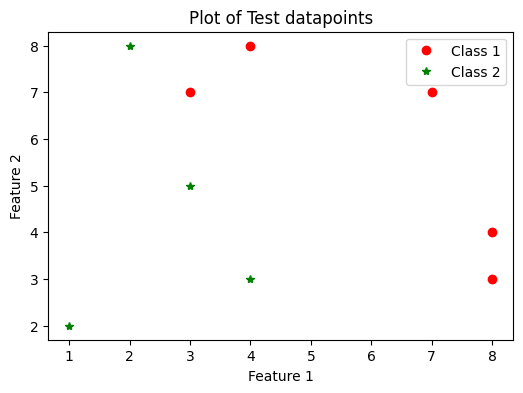

In [5]:
# Plot of classified test datapoints

class1 = test[test["class"] == 1]
class2 = test[test["class"] == 2]

plt.close()
plt.figure(figsize=(6, 4))
plt.plot(class1.iloc[:,0], class1.iloc[:,1], 'ro', label= 'Class 1')
plt.plot(class2.iloc[:,0], class2.iloc[:,1], 'g*', label= 'Class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Plot of Test datapoints")
plt.legend()
plt.show()